2.7.0
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   50   |      -3     |      -3     | -2.81053E+01|     -54     | 1.20564E+01 
 1 |  100   |      -3     |      -3     | -2.02800E+01|     -30     | 8.10195E+00 
 2 |  150   |      0      |      0      | -1.30800E+01|     -22     | 6.56914E+00 
 3 |  200   |      0      |      0      | -7.16000E+00|     -13     | 4.30980E+00 
 4 |  250   |      0      |      0      | -3.04000E+00|      -7     | 2.83521E+00 
 5 |  300   |      0      |      0      | -1.38000E+00|      -5     | 1.85354E+00 
 6 |  350   |      0      |      0      | -1.80000E-01|      -3     | 7.12461E-01 
 7 |  400   |      0      |      0      | 0.00000E+00 |      0      | 0.00000E+00 
 8 |  450   |      0      |      0      | 0.00000E+00 |      0      | 0.00000E+00 
 9 |  500   |      0      |      0      | 0.00000E+00 |      0      | 0.00000E+00

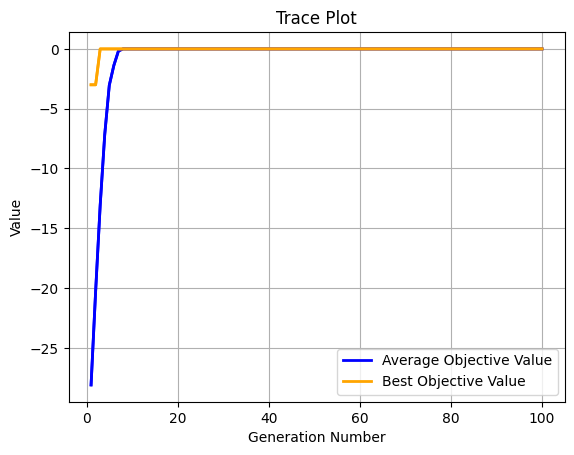

返回结果类型: <class 'list'>
返回结果是列表，长度: 2
第一个元素类型: <class 'geatpy.Population.Population'>
最优解: [0 0 0 0 0 0 0]
最大总价值: 0
总重量: 0
选择的物品: []


TypeError: list indices must be integers or slices, not str

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import geatpy as ea
import matplotlib.pyplot as plt

# 定义问题类
class Knapsack(ea.Problem):
    def __init__(self, weights, values, capacity):
        self.weights = weights
        self.values = values
        self.capacity = capacity
        name = 'Knapsack'
        M = 1  # 目标函数数目
        maxormins = [-1]  # 目标函数最小最大化标记（-1表示最大化，1表示最小化）
        Dim = len(weights)  # 决策变量维度
        varTypes = [1] * Dim  # 决策变量类型（0表示连续，1表示离散）
        lb = [0] * Dim  # 决策变量下界
        ub = [1] * Dim  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（1表示包含该变量的下边界，0表示不包含）
        ubin = [1] * Dim  # 决策变量上边界（1表示包含该变量的上边界，0表示不包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):
        # 决策变量
        X = pop.Phen
        N = X.shape[0]
        
        # 计算总重量
        total_weights = np.sum(X * self.weights, axis=1)
        
        # 计算总价值
        total_values = np.sum(X * self.values, axis=1)
        
        # 惩罚违反容量约束的解
        CV = np.zeros((N, 1))
        CV[:, 0] = total_weights - self.capacity
        CV[CV < 0] = 0
        
        # 设置目标函数值
        pop.ObjV = -total_values.reshape((-1, 1))  # 负号是因为我们设置的是最大化问题
        pop.CV = CV  # 设置违反约束程度矩阵

# 主函数
if __name__ == '__main__':

    print(ea.__version__)

    # 问题参数
    weights = np.array([2, 3, 5, 7, 1, 4, 1])  # 物品重量
    values = np.array([10, 5, 15, 7, 6, 18, 3])  # 物品价值
    capacity = 15  # 背包容量
    
    # 实例化问题
    problem = Knapsack(weights, values, capacity)
    
    # 种群设置参数
    Encoding = 'BG'  # 编码方式：二进制编码
    NIND = 50  # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders)  # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND)  # 实例化种群对象
    
    # 算法参数
    maxgen = 100  # 最大进化代数
    MAXSIZE = 100  # 全局非支配解存档的大小

    
    # 3. 算法模板实例化可能需要调整
    algorithm = ea.soea_SEGA_templet(problem, population)
    
    # 4. 算法参数设置（这部分看起来已经适配了2.7.0版本）
    algorithm.logTras = 1     # 设置每隔多少代记录日志
    algorithm.verbose = True  # 设置是否打印输出日志
    algorithm.drawing = 1     # 设置绘图方式
    algorithm.MAXGEN = maxgen # 最大进化代数
        
    # ... 之前的代码保持不变 ...

    # 求解
    res = algorithm.run()

    # 首先检查res的类型和结构
    print("返回结果类型:", type(res))
    if isinstance(res, list):
        print("返回结果是列表，长度:", len(res))
        if len(res) > 0:
            print("第一个元素类型:", type(res[0]))
    else:
        print("返回结果结构:", res)

    # 修改后的结果处理代码
    if isinstance(res, list):
        # 如果res是列表，通常第一个元素是种群对象
        pop = res[0]
        best_ind_idx = np.argmin(pop.ObjV) if hasattr(pop, 'ObjV') else 0
        best_solution = pop.Phen[best_ind_idx, :] if hasattr(pop, 'Phen') else None
        best_objv = pop.ObjV[best_ind_idx][0] if hasattr(pop, 'ObjV') else None
    else:
        # 假设res是对象而不是字典
        if hasattr(res, 'ObjV') and hasattr(res, 'Phen'):
            best_ind_idx = np.argmin(res.ObjV)
            best_solution = res.Phen[best_ind_idx, :]
            best_objv = res.ObjV[best_ind_idx][0]
        else:
            # 尝试访问population属性
            if hasattr(algorithm, 'population'):
                pop = algorithm.population
                best_ind_idx = np.argmin(pop.ObjV)
                best_solution = pop.Phen[best_ind_idx, :]
                best_objv = pop.ObjV[best_ind_idx][0]
            else:
                print("无法识别的返回结构，请检查文档或调试输出")
                best_solution = None
                best_objv = None

    # 如果成功获取了最优解
    if best_solution is not None:
        print('最优解:', best_solution)
        print('最大总价值:', -best_objv)  # 取负是因为我们之前取了负
        print('总重量:', np.sum(best_solution * weights))
        print('选择的物品:', np.where(best_solution == 1)[0])
    else:
        print("无法提取最优解，请检查算法返回结构")
    
    # 7. 添加结果可视化（选择性添加）
    if algorithm.drawing:
        plt.figure()
        plt.plot(res['ev'], '-o', label='进化过程')
        plt.title('目标函数进化过程')
        plt.xlabel('进化代数')
        plt.ylabel('目标函数值')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # 可视化最优解
        plt.figure()
        plt.bar(range(len(weights)), best_solution)
        plt.xticks(range(len(weights)), [f"物品{i}\n(重:{w},值:{v})" for i,(w,v) in enumerate(zip(weights, values))], rotation=45)
        plt.title(f'最优解 (总价值: {-res["ObjV"][best_gen][0]:.2f}, 总重量: {np.sum(best_solution * weights):.2f}/{capacity})')
        plt.grid(True)
        plt.tight_layout()
        plt.show()